# Στοχαστικές Ανελίξεις
## 5η Εργαστηριακή Άσκηση

Όνομα : Μάριος Παπαχρήστου

ΑΜ : 03115101 (ΣΗΜΜΥ ΕΜΠ)

email: papachristoumarios@gmail.com


### Παραδοτέο 1

#### Ερώτημα 1ο

Η παρατήρηση αυτή οφείλεται στη μαρκοβιανή ιδιότητα η οποία λέει ότι $$\Pr [X_n = x_n | X_{n-1} = x_{n-1}, \dotsm X_0 = x_0] = \Pr [X_n = x_n | X_{n-1} = x_{n-1}]$$

Θέλοντας να εκτιμήσουμε την $\mathbb{E}\big[X\big]$, χρησιμοποιούμε την εκτιμήτρια $ M_N=\frac{X_1+\cdots X_N}{N}$, όπου οι $X_1,\ldots,X_N$ είναι ανεξάρτητα δείγματα της τ.μ. $X$. Η μ.α. μας επιτρέπει να ξεκινήσουμε από όπου θέλουμε χωρίς να την κάνουμε συνέχεια restart. 

#### Ερώτημα 2ο 

H αναλλοίωτη κατανομή μπορεί να βρεθεί με χρήση του Θ19 ως (θέτοντας $Z = \mathbb E [T_1^+]$):
$$\pi_1(1) = 1 / Z, \qquad \pi_1(y) = \mathbb E_x \left [\sum \mathbb 1 \{ X_k = y \} \right ] / Z, \qquad y = 2,3,4$$
Επομένως μπορούμε έτσι να υπολογίσουμε την $\pi_1$

Θεωρητικά θέλουμε το $$\pi_x = \pi_x P, \; \sum_x \pi_x(x) = 1 \iff \pi_x = (18/97, 9/97, 45/97, 25/97)$$

Παρατηρούμε ότι τα δύο αποτελέσματα **συμφωνούν**. Αυτό είναι αναμενόμενο διότι η $x = 1$ είναι γν. επαναληπτική και η κλάση $\mathcal C_1 = \mathbb X$ είναι κλειστή, οπότε σύμφωνα με το Θ19 η αναλλοίωτη θα έχει συγκεκριμένη μορφή. Επομένως αναμένουμε και $\pi_1 = \pi_2 = \pi_3 = \pi_4$   

#### Ερώτημα 3ο

Στην υλοποίησή μας έχουμε ορίσει την συνάρτηση `invariant_calculation(x0, N)` που υπολογίζει την αναλλοίωτη με βάση το Θ19 για αρχική κατάσταση `x0` και `N` εκδρομές. 
Για τις υπόλοιπες αρχικές καταστάσεις προσθέτουμε ένα βρόχο
```python
for i in [1,2,3,4]:
    invariant_calculation(i)
```

και υπολογίζουμε τις $\pi_4, \pi_2, \pi_3$ οι οποίες θα βγουν ίδιες με την $\pi_1$

In [1]:
from simple_markov_chain_lib import markov_chain

## Build Markov Chain
markov_table = {
    1: {2: 0.5, 3: 0.5},
    2: {1: 1/3, 4: 2/3},
    3: {3: 0.8, 4: 0.2},
    4: {1: 0.6, 4: 0.4}
}

def invariant_calculation(x0 = 1, N = 1000000):
    print('Calculation for initial state x0={}'.format(x0))
    init_dist = {x0 : 1.0} #the chain starts from state 1 since we are interested in excursions around state 1.
    for i in range(3):
        print('\nSimulation Number : {}'.format(i + 1))
        mc = markov_chain(markov_table, init_dist)

        ##Initialize the dictionary "visits". Every state is a key of this dictionary, with value 0
        visits = {state: 0 for state in (1, 2, 3, 4)} 

        mc.start()
        completed = 0

        ##Simulate N excursions. Every time we complete an excursion we increase completed by 1.

        sum_times = 0
        t = 0
        while completed < N:
            visits[mc.running_state] += 1
            mc.move()
            if mc.running_state == x0:
                sum_times += t
                t = 1
                completed +=1
            else: t += 1    
        Z = sum_times / completed        
        print('Z = {}'.format(Z))
        invariant = {}        

        print("Expected Visits starting from 1:")
        for x, y in visits.items():
            invariant[x] = 1 / Z if x == x0 else (y / N) / Z
            print('State = {} : p = {}'.format(x, invariant[x]))
        print('Sum of all probs = {}'.format(sum(invariant.values())))
        
invariant_calculation()

Calculation for initial state x0=1

Simulation Number : 1
Z = 5.389618
Expected Visits starting from 1:
State = 1 : p = 0.1855419066805848
State = 2 : p = 0.09284294360008448
State = 3 : p = 0.46364621759835306
State = 4 : p = 0.2579691176628845
Sum of all probs = 1.0000001855419067

Simulation Number : 2
Z = 5.388479
Expected Visits starting from 1:
State = 1 : p = 0.18558112595409576
State = 2 : p = 0.09294125485132261
State = 3 : p = 0.4640817937677775
State = 4 : p = 0.2573960110079301
Sum of all probs = 1.000000185581126

Simulation Number : 3
Z = 5.388687
Expected Visits starting from 1:
State = 1 : p = 0.1855739626369095
State = 2 : p = 0.09283597284459091
State = 3 : p = 0.4638827603087728
State = 4 : p = 0.25770748978368946
Sum of all probs = 1.0000001855739626


### Παραδοτέο 2

Η εκτίμηση του V(3) με Monte Carlo δίνεται με τυχαία δειγματοληψία σημείων σε κύβο πλευράς 2 (με όγκο 8) και λαμβάνοντας αυτά που έχουν πέσει μέσα στη μοναδιαία μπάλλα έτσι η εκτίμηση του V(3) είναι $$\bar V(3) = 8 N_h / N$$
Και το σφάλμα $$\Delta V = |\bar V(3) - V(3)|, \qquad \sigma_V = \Delta V / V(3)$$

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np
# Parameters
N = 10e6  # number of required points
Ntrials, Nhits = 0, 0
acc_x, acc_y = [], []  # accepted x, y
rej_x, rej_y = [], []  # rejected x, y

# Rejection Sampling
while Nhits < N:
    Ntrials += 1
    x, y, z = np.random.uniform(-1, 1, 3)
    if x**2 + y**2 + z**2< 1:
        acc_x.append(x)
        acc_y.append(y)
        Nhits += 1
    else:
        rej_x.append(x)
        rej_y.append(y)

print("Total number of samples drawn %d" % Ntrials)
print("Number of samples in the disk %d" % N)
V3 = 4 * np.pi / 3;
V3_est = 8 *   (Nhits / Ntrials)
err = abs(V3_est - V3)
print('Theoretical V(3)=' + str(V3) )
print('Experimental V(3)=' + str(V3_est))
print('Error = {}'.format(err))
print('Relative Error = {}'.format(err / V3))



Total number of samples drawn 19091006
Number of samples in the disk 10000000
Theoretical V(3)=4.1887902047863905
Experimental V(3)=4.1904549189288405
Error = 0.0016647141424499523
Relative Error = 0.0003974212269088433


Με τον ίδιο τρόπο βρίσκουμε το εμβαδό του λιμνήσκου $L$ και του ολοκληρώματος $$I = \iint_L |x + y|\; dx dy$$

Total ratio: 0.5000157004929955
Total number of samples drawn 19999372
Number of samples in the disk 10000000


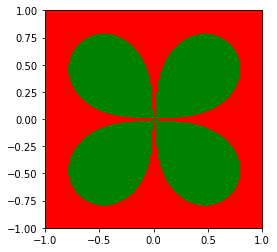

Lake area is 4 times the ratio of Nhits / Ntrials so |L|=2.000062801971982


In [6]:
N = 10e6
Ntrials, Nhits = 0, 0
acc_x, acc_y = [], []  # accepted x, y
rej_x, rej_y = [], []  # rejected x, y

# Rejection Sampling
while Nhits < N:
    Ntrials += 1
    x, y = np.random.uniform(-1, 1, 2)
    if ( x**2 + y**2 ) **2 <= 2 * abs(x * y):
        acc_x.append(x)
        acc_y.append(y)
        Nhits += 1
    else:
        rej_x.append(x)
        rej_y.append(y)

ratio = Nhits / Ntrials
print('Total ratio: ' + str(ratio))

print("Total number of samples drawn %d" % Ntrials)
print("Number of samples in the disk %d" % N)

fig, ax = plt.subplots()

plt.scatter(acc_x, acc_y, color = 'green', s = 1) # parameter s determines the size of each dot in the scatter plot
plt.scatter(rej_x, rej_y, color = 'red', s = 1)

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_aspect('equal')  # set aspect ratio 1:1

plt.show()
L = 4 * ratio
print('Lake area is 4 times the ratio of Nhits / Ntrials so |L|={}'.format(L))

In [7]:
s = 0
for x, y in zip(acc_x, acc_y):
    s += abs(x + y)
s /= Nhits
I = L * s
print('Area in L of f(x,y) = |x + y| is {}'.format(I) )

Area in L of f(x,y) = |x + y| is 0.9904737199833581


Ο υπολογισμός του 2ου ολοκληρώματος έγινε χρησιμοποιώντας τα σημεία που έχουμε δεχτεί και βρίσκονται μέσα στο λημνίσκο δηλαδή:

$$I  = \frac {|L|} {N_h} \; \sum_{(x, y) \in L} |x + y| $$



## Αναφορές 

[1] Λουλάκης Μιχαήλ, Στοχαστικές Ανελίξεις, Κάλλιπος